In [3]:
import time
import os
import cv2
import keras
import random
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.engine import Layer
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate, Activation, Dense, Dropout, Flatten, LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model
from keras.layers.core import RepeatVector
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from skimage.measure import compare_ssim as ssim
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from skimage import exposure

Using TensorFlow backend.


In [4]:
batch_size = 20
train_dir = 'C:/Users/n3rDx/Desktop/Homework Upload/Capstone/few_images/Train/'
testing = '../train_images/Train'

In [5]:
image_gen = ImageDataGenerator()

In [65]:
for i in image_gen.flow_from_directory(train_dir, batch_size=1, class_mode=None, shuffle=False):
    break

Found 200 images belonging to 1 classes.


255.0

In [26]:
# Turn images to gray
imgs = []
for filename in os.listdir('../Capstone/few_images/Train/Train/'):
    imgs.append(img_to_array(load_img('C:/Users/n3rDx/Desktop/Homework Upload/Capstone/few_images/Train/Train/'+filename)).astype('uint8'))
imgs = np.array(imgs, dtype='uint8')

In [34]:
for i in range(200):
    gray_img = rgb2gray(imgs[i])
    imsave("C:/Users/n3rDx/Desktop/Homework Upload/Capstone/few_images/Gray/"+str(i)+".jpg", gray_img)

W0630 12:17:51.836730  8784 util.py:64] Lossy conversion from float64 to uint8. Range [0.0, 254.36250000000004]. Convert image to uint8 prior to saving to suppress this warning.
W0630 12:17:51.844747  8784 util.py:64] Lossy conversion from float64 to uint8. Range [0.0, 240.44799999999998]. Convert image to uint8 prior to saving to suppress this warning.
W0630 12:17:51.856730  8784 util.py:64] Lossy conversion from float64 to uint8. Range [1.2788, 254.78750000000002]. Convert image to uint8 prior to saving to suppress this warning.
W0630 12:17:51.864730  8784 util.py:64] Lossy conversion from float64 to uint8. Range [0.0, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.
W0630 12:17:51.876732  8784 util.py:64] Lossy conversion from float64 to uint8. Range [0.0, 208.50780000000003]. Convert image to uint8 prior to saving to suppress this warning.
W0630 12:17:51.884734  8784 util.py:64] Lossy conversion from float64 to uint8. Range [0.0, 251.42300000000

In [28]:
imgs.

(200, 256, 256, 3)

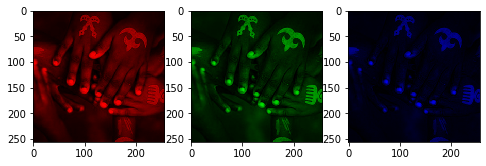

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()
pic = imgs[20]
for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)


In [80]:
for i in image_gen.flow_from_directory(train_dir, batch_size=batch_size, class_mode=None, shuffle=False):
    lab_batch = (rgb2lab(i))
    #normalize the ab channels to 0-1
    lab_scaled = (lab_batch) / [100, 255, 255]
    X_train = lab_scaled[:,:,:,0]
    X_train = X_train.reshape(X_train.shape+(1,))
    y_train = lab_scaled[:,:,:,1:]
    break

Found 200 images belonging to 1 classes.


In [78]:
lab_scaled[0][:,:,2].max()

9.076434642434373

W0702 11:50:38.096089   732 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 11:50:38.199162   732 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


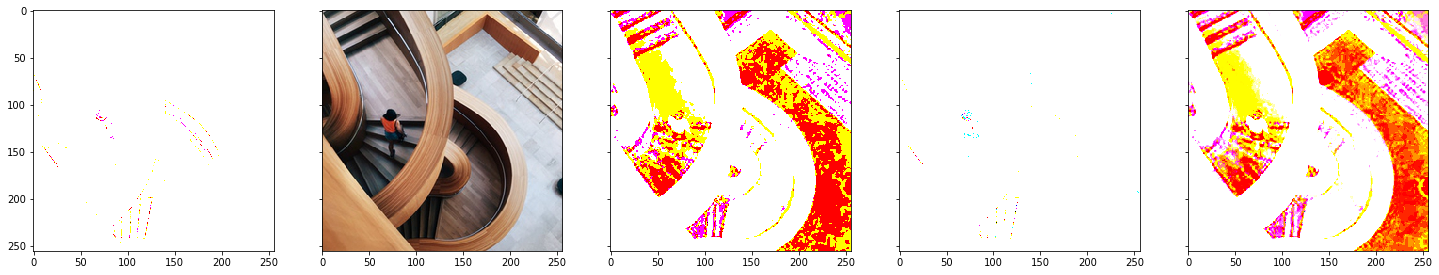

In [81]:
lab_scaled = (lab_batch + [0, 128, 128]) / [100, 255, 255]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 25),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(lab2rgb(lab_scaled[3] * [100, 255, 255]))
ax[1].imshow(i[3]/255)
ax[2].imshow(lab_batch[3])
ax[3].imshow(lab2rgb(lab_batch[3]))
ax[4].imshow(lab_scaled[3])

In [200]:
# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = lab_test[i][:,:,0]*100
    cur[:,:,1:] = output[i]*100
    #result = np.concatenate((lab_test[i], output[i]), axis=2)
    picture = lab2rgb(cur).astype('uint8')
    imsave("C:/Users/n3rDx/Desktop/Homework Upload/Capstone/results/"+str(i)+".jpg", picture)

C:\Users\n3rDx\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 682 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\n3rDx\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 2309 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\n3rDx\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 305 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\n3rDx\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 4 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\n3rDx\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 3 pixels
  warn('Color data out of range: Z < 0 in %s pixel

In [112]:
rgb2lab(processed_img)[0][:,:,1:].max()

48.40039594088141

In [15]:
#custom image augmentation function
def custom_preprocessing(image):
    state = random.randint(0,2)
    if state == 0:
        processed_img = exposure.equalize_adapthist((image*1.0/255), clip_limit=0.02)
    elif state == 1:
        processed_img = exposure.equalize_hist(image)
    elif state == 2:
        p2, p98 = np.percentile(image, (2,98))
        processed_img = exposure.rescale_intensity(image, in_range=(p2,p98))
    return processed_img

image_gen = ImageDataGenerator()
        #preprocessing_function=custom_preprocessing)

In [16]:
# For looking at the range of X_train, y_train and i
for i in image_gen.flow_from_directory(train_dir, batch_size=batch_size, class_mode=None, shuffle=False):
    lab_batch = (rgb2lab(i))
    #normalize the ab channels to 0-1
    lab_scaled = lab_batch  / [100, 255, 255]
    X_train = lab_batch[:,:,:,0]
    X_train = X_train.reshape(X_train.shape+(1,))
    y_train = lab_batch[:,:,:,1:]
    break

Found 200 images belonging to 1 classes.


In [19]:
i.max()

255.0

W0702 11:34:34.291014   732 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 11:34:34.303027   732 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'lab_batch picture')

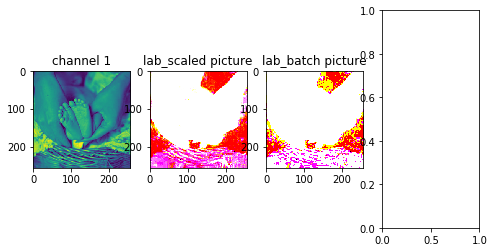

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow((i[0]/255)[:,:,2])
ax[0].set_title("channel 1")
ax[1].imshow(lab_scaled[0][:,:,:])
ax[1].set_title("lab_scaled picture")
ax[2].imshow(lab_batch[0][:,:,:])
ax[2].set_title("lab_batch picture")


In [159]:
print("Orginal picture range is: (",i.min(),",",i.max(),")")
print("Processed picture range is: (",processed_img.min(),",",processed_img.max(),")")
print("LAB picture channel 0 range is: (",lab_batch[:,:,:,0].min(),",",lab_batch[:,:,:,0].max(),")")
print("LAB picture channel 1 range is: (",lab_batch[:,:,:,1].min(),",",lab_batch[:,:,:,1].max(),")")
print("LAB picture channel 2 range is: (",lab_batch[:,:,:,2].min(),",",lab_batch[:,:,:,2].max(),")")
print('\n')
print("LAB scaled picture channel 0 range is: (",lab_scaled[:,:,:,0].min(),",",lab_scaled[:,:,:,0].max(),")")
print("LAB scaled picture channel 1 range is: (",lab_scaled[:,:,:,1].min(),",",lab_scaled[:,:,:,1].max(),")")
print("LAB scaled picture channel 2 range is: (",lab_scaled[:,:,:,2].min(),",",lab_scaled[:,:,:,2].max(),")")
print("X_train picture range is: (",X_train.min(),",",X_train.max(),")")
print("y_train picture range is: (",y_train.min(),",",y_train.max(),")")

Orginal picture range is: ( 0.0 , 1.0 )
Processed picture range is: ( 0.009833017985026041 , 1.0 )
LAB picture channel 0 range is: ( 0.0 , 100.0 )
LAB picture channel 1 range is: ( -68.96950257529777 , 80.12432275583286 )
LAB picture channel 2 range is: ( -78.71937657456075 , 82.18163005517115 )


LAB scaled picture channel 0 range is: ( 0.0 , 1.0 )
LAB scaled picture channel 1 range is: ( -0.2704686375501873 , 0.31421303041503085 )
LAB scaled picture channel 2 range is: ( -0.30870343754729707 , 0.3222809021771418 )
X_train picture range is: ( 0.0 , 1.0 )
y_train picture range is: ( -0.30870343754729707 , 0.3222809021771418 )


In [181]:
cur = np.zeros((256, 256, 3))
cur[:,:,0] = X_train[1][:,:,0]
cur[:,:,1:] = y_train[1][:,:,1:]
#cur = cur * [100, 128, 128]
picture = lab2rgb(cur)
picture *= 255

In [195]:
result = np.dstack((X_train[2], y_train[2]))
result = lab2rgb(result)

In [215]:
result

array([[[0.02966102, 0.16101694, 0.29237289],
        [0.02542373, 0.15677964, 0.28813559],
        [0.02966102, 0.16101694, 0.29237289],
        ...,
        [0.08474578, 0.21610169, 0.33898308],
        [0.07627118, 0.19067798, 0.31355933],
        [0.05932203, 0.14830509, 0.27118645]],

       [[0.02966102, 0.16101694, 0.29237289],
        [0.02966102, 0.16101694, 0.29237289],
        [0.02966102, 0.16101694, 0.29237289],
        ...,
        [0.06355932, 0.20762712, 0.32627118],
        [0.06779661, 0.18220339, 0.30508473],
        [0.04661017, 0.14830509, 0.26694915]],

       [[0.02966102, 0.16101694, 0.29237289],
        [0.02966102, 0.16101694, 0.29237289],
        [0.02966102, 0.16101694, 0.29237289],
        ...,
        [0.05508474, 0.20338983, 0.32203394],
        [0.05932203, 0.18644069, 0.30508473],
        [0.04237288, 0.15254236, 0.26694915]],

       ...,

       [[0.05084745, 0.00847458, 0.05508474],
        [0.03813559, 0.00423729, 0.05084745],
        [0.0338983 , 0

In [214]:
y_train.max()

88.8935552879523

In [209]:
test = []
for filename in os.listdir('../Capstone/test_images/test'):
        test.append(img_to_array(load_img('C:/Users/n3rDx/Desktop/Homework Upload/Capstone/test_images/test/'+filename)))
test = np.array(test).astype('float64')

array([[[[0.49803922, 0.50196078, 0.52156863],
         [0.50980392, 0.51372549, 0.53333333],
         [0.51372549, 0.51764706, 0.5372549 ],
         ...,
         [0.54117647, 0.54509804, 0.56470588],
         [0.54117647, 0.54509804, 0.56470588],
         [0.54117647, 0.54509804, 0.56470588]],

        [[0.45098039, 0.45490196, 0.47058824],
         [0.50588235, 0.50980392, 0.52941176],
         [0.49803922, 0.50196078, 0.52156863],
         ...,
         [0.51764706, 0.52156863, 0.54117647],
         [0.52156863, 0.5254902 , 0.54509804],
         [0.51372549, 0.51764706, 0.5372549 ]],

        [[0.33333333, 0.3372549 , 0.35294118],
         [0.45882353, 0.4627451 , 0.48235294],
         [0.4627451 , 0.46666667, 0.48627451],
         ...,
         [0.46666667, 0.47058824, 0.49019608],
         [0.46666667, 0.47058824, 0.49019608],
         [0.4627451 , 0.46666667, 0.48235294]],

        ...,

        [[0.10980392, 0.10980392, 0.11764706],
         [0.07843137, 0.07843137, 0.08627451]